In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

## Read Data

In [ ]:
# list tất cả path của file trong thư mục
df_main = pd.DataFrame(data=None)
dataset_path = '/content/drive/MyDrive/Dataset/cicids2017'
all_samples = [f for f in listdir(dataset_path) if isfile(join(dataset_path, f))] #list comprehension
for samples in all_samples:
    file_path = join(dataset_path, samples)
    print(file_path)
    temp = pd.read_csv(file_path)
    df_main = pd.concat([df_main, temp], ignore_index=True)

/content/drive/MyDrive/Dataset/cicids2017/Thursday-WebAttacks.csv
/content/drive/MyDrive/Dataset/cicids2017/Wednesday-DDoS-HeartBleed.csv
/content/drive/MyDrive/Dataset/cicids2017/Monday.csv
/content/drive/MyDrive/Dataset/cicids2017/Friday-Botnet.csv
/content/drive/MyDrive/Dataset/cicids2017/Friday-DDoS.csv
/content/drive/MyDrive/Dataset/cicids2017/Tuesday-BruteForce.csv
/content/drive/MyDrive/Dataset/cicids2017/Thursday-Infilteration.csv
/content/drive/MyDrive/Dataset/cicids2017/Friday-PortScan.csv


In [ ]:
# Remove unnecessary data
import gc
del temp
gc.collect()

0

## Analyze Data

In [ ]:
df_main.shape

(2830743, 79)

In [ ]:
df_main.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [ ]:
df_main.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [ ]:
df_main.iloc[:,-1].value_counts()

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64

Dựa vào Paper ta có thể thấy ở đây Web Attack được đưa vào thành 1 nhóm chung. Nên vì thế nhãn output của chúng ta sẽ gồm 12 loại:
1. Benign
2. DoS
    - Hulk
    - Golden Eye
    - DDoS
    - Slowhttptest
    - Slowloris
3. Port Scan
4. Bot `Minor`
5. Infilteration `Minor`
6. FTP-Pataor
7. SSH-Pataor
8. Heartbleed `Minor`
9. Web Attacks

In [ ]:
# Vì columns name có khoảng trắng ở đầu nên ta tiến hành loại bỏ đi
df_main.rename(columns=lambda x: x.strip(), inplace=True)

In [ ]:
# Merge Web Attacks catagories vào thành 1 loại
# df_main.mask('Web Attack' in df_main['Label'], other='Web Attack', inplace=True)
df_main['Label'].replace(['Web Attack � Brute Force', 'Web Attack � XSS', 'Web Attack � Sql Injection'], 'Web Attack', inplace=True)

In [ ]:
df_main.iloc[:,-1].value_counts()

BENIGN              2273097
DoS Hulk             231073
PortScan             158930
DDoS                 128027
DoS GoldenEye         10293
FTP-Patator            7938
SSH-Patator            5897
DoS slowloris          5796
DoS Slowhttptest       5499
Web Attack             2180
Bot                    1966
Infiltration             36
Heartbleed               11
Name: Label, dtype: int64

In [ ]:
df_main.shape

(2830743, 79)

## Clean data

In [ ]:
df_main.drop(columns=df_main.columns[0], axis=1, inplace=True) # drop first columns (port columns)

In [ ]:
# Replace NaN values and Inf valueddddddds
df_main['Flow Bytes/s'].fillna(0, inplace=True)
df_main = df_main[np.isfinite(df_main.iloc[:,0:-1]).all(1)]

In [ ]:
# Convert to float64
df_main[df_main.select_dtypes(np.int64).columns] = df_main.select_dtypes(np.int64).astype(np.float64)

## SMOTE data

In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
# only oversampling
def oversample_data(x, y, oversample_fraction):
    oversample = SMOTE(sampling_strategy=oversample_fraction)
    return oversample.fit_resample(x, y)

In [ ]:
# oversample and undersample
def over_under_sample(x, y, upper_sample, under_sample):
    over = SMOTE(sampling_strategy=upper_sample)
    under = RandomUnderSampler(sampling_strategy=under_sample)
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)
    return pipeline.fit_resample(x, y)

## Preprocess Data

In [ ]:
# Maping data into categories
df_label = df_main['Label'].map({
    'BENIGN': 0,
    'DoS Hulk': 1,
    'DoS GoldenEye': 2,
    'DoS slowloris': 3,
    'DoS Slowhttptest': 4,
    'DDoS': 5,
    'PortScan': 6,
    'FTP-Patator': 7,
    'SSH-Patator': 8,
    'Web Attack': 9,
    'Bot': 10,
    'Infiltration': 11,
    'Heartbleed': 12,
})
df_main.drop('Label', axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_main = scaler.fit_transform(df_main)

In [ ]:
df_label.value_counts()

0     2271320
1      230124
6      158804
5      128025
2       10293
7        7935
8        5897
3        5796
4        5499
9        2180
10       1956
11         36
12         11
Name: Label, dtype: int64

## Split Train and Test to CSV

In [ ]:
train, test = train_test_split(df_main, test_size=0.4, random_state=20, shuffle=True)

In [ ]:
train.to_csv('train_data.csv', index=False)
test.to_csv('test_data.csv', index=False)

In [ ]:
del train, test
gc.collect()

712

In [ ]:
train.iloc[:, -1:].value_counts()

Label           
BENIGN              1361979
DoS Hulk             138547
PortScan              95405
DDoS                  76909
DoS GoldenEye          6207
FTP-Patator            4744
SSH-Patator            3583
DoS slowloris          3498
DoS Slowhttptest       3329
Web Attack             1326
Bot                    1167
Infiltration             25
Heartbleed                6
dtype: int64

## Separate rare class and copy to csv

In [ ]:
df_hb_rare = train[train['Label'] == 'Heartbleed']
df_if_rare = train[train['Label'] == 'Infiltration']
df_bot_rare = train[train['Label'] == 'Bot']
df_web_rare = train[train['Label'] == 'Web Attack']

In [ ]:
df_hb_rare

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1572957,119302728,2685,1729,8299,7556917,517,0,3.090875,16.858421,17376,...,32,2217.0,0.0,2217,2217,5024984.0,0.0,5024984,5024984,Heartbleed
1573652,24719667,590,436,7442,1636683,5792,0,12.613559,238.708658,13032,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
1573363,119259012,2801,2069,12264,7879536,4344,0,4.378436,83.107845,15928,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
1573092,119260295,2791,2114,13712,7878088,5792,0,4.912934,110.396187,13032,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
1573036,119261118,2794,2130,12264,7879536,4344,0,4.389406,83.211635,13032,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
1573640,119296592,2797,2006,13712,7878088,5792,0,4.902395,110.277907,13032,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed


## RF - SMOTE
Mô hình RF thông thường chưa GAN, sử dụng SMOTE

### Trainning

In [ ]:
# SPLIT DATA
x_train, x_test, y_train, y_test = train_test_split(df_main, df_label, test_size=0.2, random_state=10)

In [ ]:
y_train.value_counts()

0     1817097
1      184102
6      126991
5      102500
2        8231
7        6293
8        4754
3        4593
4        4404
9        1740
10       1560
11         29
12          6
Name: Label, dtype: int64

In [ ]:
# ONLY FOR SMOTE MODEL
up_strategy = {12:10000, 11:10000, 10:10000}
down_strategy = {0:1000000, 1:100000}
x_train, y_train = over_under_sample(x_train, y_train, up_strategy, down_strategy)

In [ ]:
# TRAIN DATA AFTER SMOTE
y_train.value_counts()

0     1000000
6      126991
5      102500
1      100000
10      10000
11      10000
12      10000
2        8231
7        6293
8        4754
3        4593
4        4404
9        1740
Name: Label, dtype: int64

In [ ]:
clf = RandomForestClassifier(random_state = 10)
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=10)

### Evaluate

In [ ]:
# Evaluate metric for binary
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
def evaluate_metric(y_test, y_pred):
    print('Precision: %.4f' % precision_score(y_test, y_pred, average='weighted'))
    print('Recall: %.4f' % recall_score(y_test, y_pred, average='weighted'))
    print('F1: %.4f' % f1_score(y_test, y_pred, average='weighted'))
    print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
evaluate_metric(y_test, y_pred)

Precision: 0.9978
Recall: 0.9978
F1: 0.9978
Accuracy: 0.9978


<Axes: >

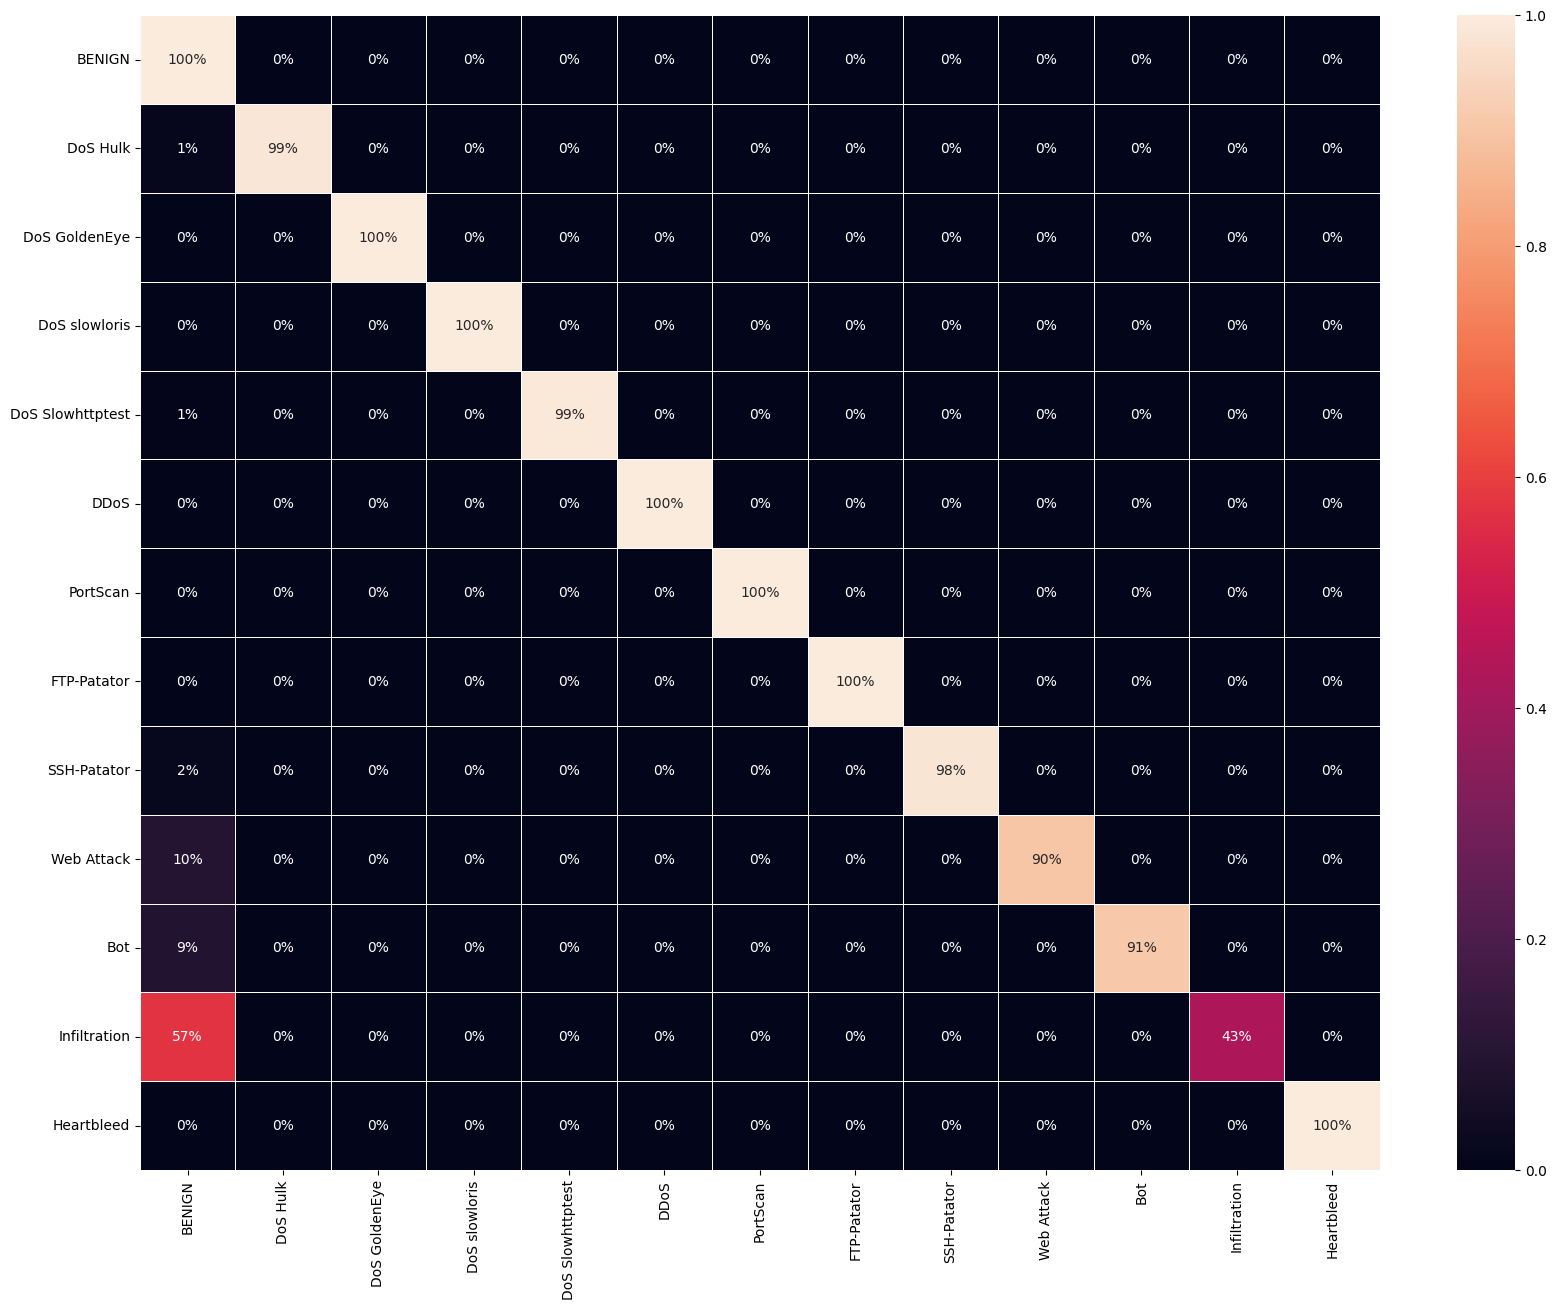

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

columns = [
    'BENIGN',
    'DoS Hulk',
    'DoS GoldenEye',
    'DoS slowloris',
    'DoS Slowhttptest',
    'DDoS',
    'PortScan',
    'FTP-Patator',
    'SSH-Patator',
    'Web Attack',
    'Bot',
    'Infiltration',
    'Heartbleed']

fig, ax = plt.subplots(figsize=(20,15))
cf_matrix = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cf_matrix, fmt='.0%', annot=True, ax=ax, linewidths=0.5, xticklabels=columns, yticklabels=columns)

In [ ]:
# Accuracy for each class
cf_matrix.diagonal()/cf_matrix.sum(axis=1)

array([0.99894986, 0.98607188, 0.99612027, 0.99667498, 0.98995434,
       0.99968658, 0.99977996, 0.99939099, 0.98337708, 0.9       ,
       0.90656566, 0.42857143, 1.        ])

## RF - NO SMOTE

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_main, df_label, test_size=0.4, random_state=10)
clf = RandomForestClassifier(random_state = 10)
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=10)

In [ ]:
# Evaluate metric for binary
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
def evaluate_metric(y_test, y_pred):
    print('Precision: %.4f' % precision_score(y_test, y_pred, average='weighted'))
    print('Recall: %.4f' % recall_score(y_test, y_pred, average='weighted'))
    print('F1: %.4f' % f1_score(y_test, y_pred, average='weighted'))
    print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
evaluate_metric(y_test, y_pred)

Precision: 0.9982
Recall: 0.9982
F1: 0.9982
Accuracy: 0.9982


<Axes: >

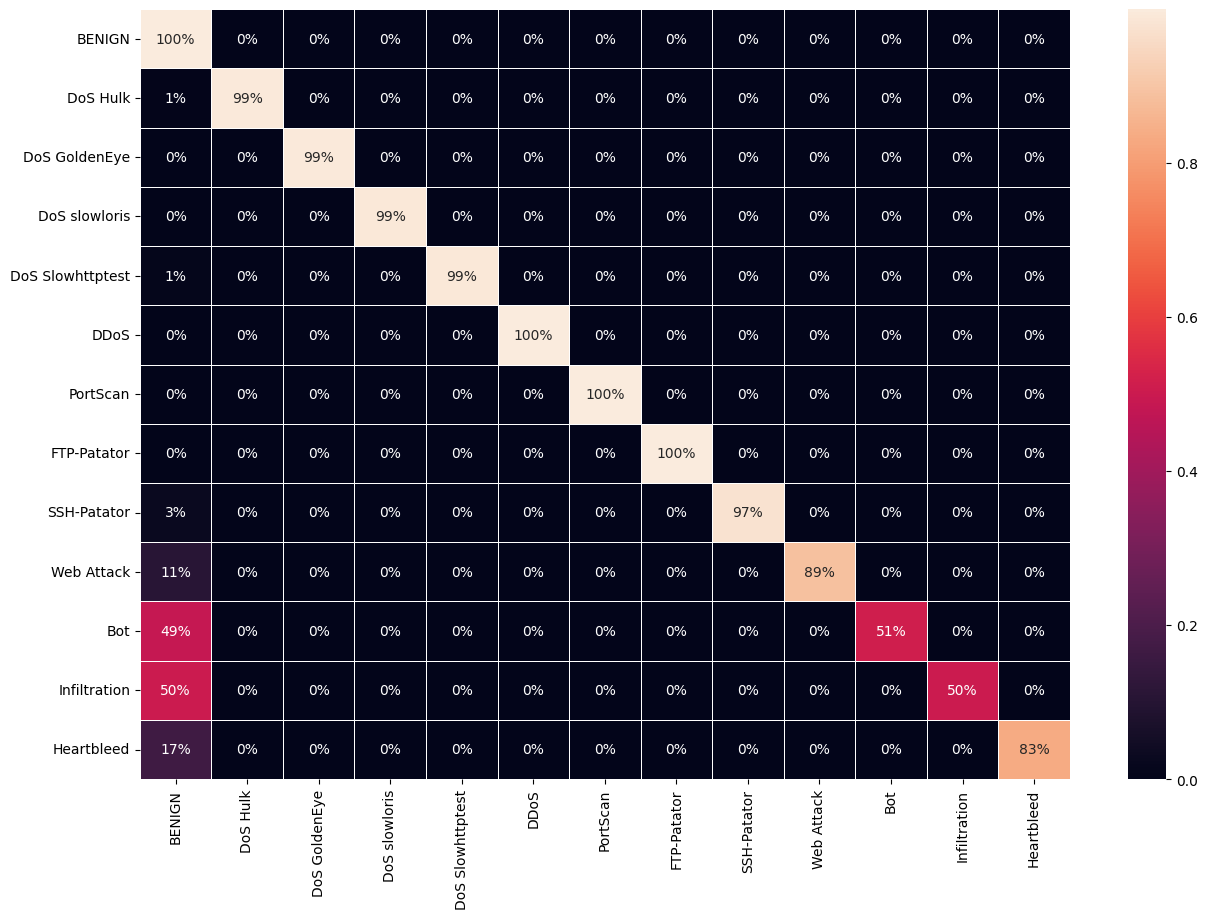

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

columns = [
    'BENIGN',
    'DoS Hulk',
    'DoS GoldenEye',
    'DoS slowloris',
    'DoS Slowhttptest',
    'DDoS',
    'PortScan',
    'FTP-Patator',
    'SSH-Patator',
    'Web Attack',
    'Bot',
    'Infiltration',
    'Heartbleed']

fig, ax = plt.subplots(figsize=(15,10))
cf_matrix = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cf_matrix, fmt='.0%', annot=True, ax=ax, linewidths=0.5, xticklabels=columns, yticklabels=columns)